## Question 3 part (b)

Write the pseudo-code of gradient descent algorithm for finding the global minimum of (1).
Implement your suggested algorithm using your favorite programming language. Find the
correct step-size by try and error.

## Gradient Descent (Matrix Implementation)

In [1]:
import numpy as np
import math as m
import pandas as pd

In [2]:
#Define the Function
Q = np.matrix([[6,7,1],[7,11,2],[1,2,22]])
b = np.array([-1,2,3]).reshape(3,1)
c = -2
a = 1/2

In [3]:
def func2(x):
    x = np.array(x).reshape(3,1)
    b.reshape(3,1)
    f = np.asscalar(a*(np.dot(x.T,(Q.dot(x))))+np.dot(b.T,x) + c)
    return f

In [4]:
def grad2(x):
    x = np.array(x).reshape(3,1)
    g = np.array(Q.dot(x)+b)
    return g

Gradient Descent Code/Implementation:

In [5]:
x_next = [1,1,1] #choose initial starting position
error_tol = 0.001
check = np.linalg.norm(grad2(x_next))
alpha = .0821
step = 0
while check >= error_tol:
    x_current = np.array(x_next).reshape(3,1)
    x_next = x_current - alpha*grad2(x_current)
    check = np.linalg.norm(grad2(x_next))
    step = step+1
print("Global Minimum found at:", x_next.T)
print("Minimum function value:",func2(x_next))
print("Gradient Magnitude:", check)
print("Number of steps:", step)

Global Minimum found at: [[ 1.45159891 -1.08668125 -0.10354596]]
Minimum function value: -3.9686644365514216
Gradient Magnitude: 0.0009690239696952738
Number of steps: 82


Trial and Error to find the optimal step size:

In [6]:
#wrap the GD implementation into a function for use in a loop
#x_next argument defines initial position
def GD_trialer(error_tol, x_next, alpha):
    step = 0
    check = np.linalg.norm(grad2(x_next))
    while check >= error_tol:
        x_current = np.array(x_next).reshape(3,1)
        x_next = x_current - alpha*grad2(x_current)
        check = np.linalg.norm(grad2(x_next))
        step = step+1
    return (step, check)

In [7]:
#create empty lists to store trial values
learning_rates = []
total_steps = []
gradient_values = []

In [8]:
#Define an upper bound for our learning rates based on formula
alpha_upper = 2/max(np.linalg.eigvals(Q))
alpha_upper

0.08800934716402213

In [9]:
#Running trials to find optimal alpha learning rate
#Note: loop can't initialize at 0 or else alpha = 0 and GD is stationary
for a in np.arange(0.0001,alpha_upper,0.001):
    error_tol = 0.001
    x_init = [1,1,1]
    learning_rates.append(a)
    total_steps.append(GD_trialer(error_tol,x_init,a)[0])
    gradient_values.append(GD_trialer(error_tol,x_init,a)[1])

In [10]:
GDTrials = pd.DataFrame(np.column_stack([learning_rates,\
                                         total_steps, gradient_values]),\
                            columns=['alpha_value', 'total_steps','gradient_values'])

In [11]:
GDTrials = GDTrials[['alpha_value','total_steps']]

In [12]:
#Find where the minimum number of steps occurs
GDTrials.loc[GDTrials['total_steps'].idxmin()]

alpha_value     0.0821
total_steps    82.0000
Name: 82, dtype: float64

In [13]:
GDTrials[-10:]

,alpha_value,total_steps
78,0.0781,86.0
79,0.0791,85.0
80,0.0801,84.0
81,0.0811,83.0
82,0.0821,82.0
83,0.0831,90.0
84,0.0841,113.0
85,0.0851,153.0
86,0.0861,236.0
87,0.0871,501.0


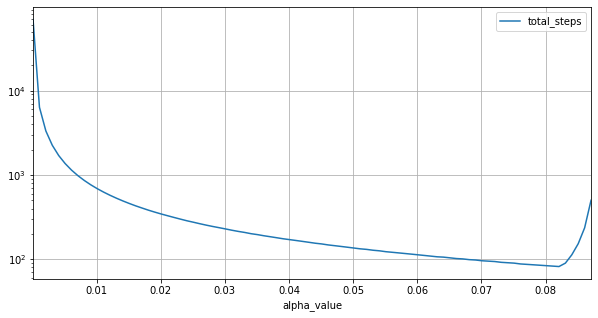

In [19]:
#Plot the trial results
GDTrials.set_index('alpha_value').plot(figsize=(10,5),grid=True).set_yscale('log')

Assuming that that we want an 0.001 error tolerance, then the optimal alpha step size for gradient descent is 0.0821

## Gradient Descent (ComponentWise Implementation)

In [15]:
def func(vec):
    x1 = vec[0]
    x2 = vec[1]
    x3 = vec[2]
    f = 3*(x1**2)+(5.5)*x2**2+\
    11*x3**2+7*(x1*x2)+(x1*x3)+2*(x2*x3)-x1+2*(x2)+3*(x3) -2
    return f

In [16]:
def grad(vec):
    x1 = vec[0]
    x2 = vec[1]
    x3 = vec[2]
    g = np.array([(6*x1)+(7*x2)+x3-1,7*x1+11*x2+2*x3+2, x1+2*x2+22*x3+3])
    return g

Alternative Gradient Descent Code/Implementation:

In [17]:
max_iters = 100000
error_tol = .001 
#Consider using a set random state with np.random.rand(3)*100
x_next = [1,1,1] #initialize a starting point
alpha = .0821 #pick a learning rate between 0 and the maxeigenvalue of the hessian
step = 0
#since the hessian trace = 78, 2/78 defines 
#an upperbound for the learning rate to guarantee convergence
for i in range(max_iters):
    x_current = x_next
    x_next = x_current - alpha*grad(x_current)
    check = np.linalg.norm(grad(x_next))
    step = step+1
    if abs(check) <= error_tol:
        break
    elif step == max_iters:
        print("Maximum Iterations Exceeded.")
print("Minimum reached at:", x_next)
print("Minimum Cost realized at:", func(x_next))
print("Gradient Value:",check)
print("Number of steps:", step)

Minimum reached at: [ 1.45159891 -1.08668125 -0.10354596]
Minimum Cost realized at: -3.9686644365514208
Gradient Value: 0.0009690239696952738
Number of steps: 82


## Question 3 part (c)

Write the pseudo-code of coordinate descent algorithm for finding the global minimum of (1).
Implement your suggested algorithm using your favorite programming language.

## Block Coordinate Descent Algorithm

In [18]:
def x1next(vec):
    x2 = vec[1]
    x3 = vec[2]
    next_x1 = (1/6) - (7/6)*x2-(1/6)*x3
    return next_x1

def x2next(vec):
    x1 = vec[0]
    x3 = vec[2]
    next_x2 = (-2/11)-(7/11)*x1-(2/11)*x3
    return next_x2

def x3next(vec):
    x1 = vec[0]
    x2 = vec[1]
    next_x3 = (-3/22) - (1/22)*x1-(1/11)*x2
    return next_x3

error_tol = 0.001
x_next = [1,1,1]
step_counter = 0
max_steps = 100
check = np.linalg.norm(grad(x_next))
while check > error_tol: #or step_counter < max_steps:
    x_current = x_next
    #Block Coordinate Descent
    x1_step = x1next(x_current)
    x_current[0] = x1_step
    x2_step = x2next(x_current)
    x_current[1] = x2_step
    x3_step = x3next(x_current)
    x_current[2] = x3_step
    #Update
    x_next = x_current
    step_counter = step_counter+1
    check = np.linalg.norm(grad(x_current))
    #print(x_next)
print('Minimum attained at:', x_next)
print('Minimum cost realized at:', func(x_next))
print('Total Steps:',step_counter)
print('gradient value:', check)

Minimum attained at: [1.4517370549529063, -1.0868231981839147, -0.10354957539023074]
Minimum cost realized at: -3.968664591642378
Total Steps: 29
gradient value: 0.000889647315196129
